In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
import re
%matplotlib inline

# Для отрисовки графиков
import seaborn as sns
import warnings

# Загрузка датасетов из облака google
import gdown

# Для работы с файлами
import os
from os import listdir

from PIL import Image


# Модуль Garbage Collector - для помощи в освобождении памяти (Удаляет лишние/неиспользуемые данные)
import gc

# импортируем модуль для загрузки данных
import gdown

from osgeo import gdal
from osgeo import ogr
from osgeo import osr
from osgeo import gdal_array
#from osgeo import gdalcons


In [ ]:
# загрузка тренировочного датасета
gdown.download('https://lodmedia.hb.bizmrg.com/case_files/1166565/train_dataset_skoltech_train.zip', None, quiet=True)
!unzip -q '/content/train_dataset_skoltech_train.zip' -d /content/

In [ ]:
# загрузка тренировочного датасета
gdown.download('https://lodmedia.hb.bizmrg.com/case_files/1166565/test_dataset_test_scoltech.zip', None, quiet=True)
!unzip -q '/content/test_dataset_test_scoltech.zip' -d /content/

replace /content/readme.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
https://lodmedia.hb.bizmrg.com/case_files/1166565/test_dataset_test_scoltech.zip

In [ ]:
#1 - 10680 10134
#2 - 6744  2648
#4 - 6708  4389
#5 - 3230  2336
#6_1 - 10632 4971
#6_2 - 10632 4971
#9_1 - 512 512
#9_2 - 512 512

In [ ]:
IMAGE_PATH = '/content/train/images/'
IMAGE_test = '/content/test_scoltech/images/'
#scena=os.listdir(IMAGE_PATH)
scena=["9_1.tif", "9_2.tif", "5.tif", "2.tif"]
test=os.listdir(IMAGE_test)


In [ ]:
dftest = pd.DataFrame(columns=['Name', 'RasterXSize', 'RasterXSize', 'band_1', 'band_2', 'band_3', 'band_4', 'band_5', 'band_6', 'band_7', 'band_8', 'band_9', 'band_10'])  # ,'dbn1','dbn2','dbn3','dbn4'])
for filename in test:
    gdalData = gdal.Open(IMAGE_test+filename)
    if gdalData is None:
        print("ERROR: can't open raster")
        sys.exit( 1 )
    dftest.loc[len(dftest.index)]=[filename, gdalData.RasterXSize, gdalData.RasterYSize,
          gdalData.GetRasterBand( 1 ).ReadAsArray(), gdalData.GetRasterBand( 2 ).ReadAsArray(),
          gdalData.GetRasterBand( 3 ).ReadAsArray(), gdalData.GetRasterBand( 4 ).ReadAsArray(),
          gdalData.GetRasterBand( 5 ).ReadAsArray(), gdalData.GetRasterBand( 6 ).ReadAsArray(),
          gdalData.GetRasterBand( 7 ).ReadAsArray(), gdalData.GetRasterBand( 8 ).ReadAsArray(),
          gdalData.GetRasterBand( 9 ).ReadAsArray(), gdalData.GetRasterBand( 10 ).ReadAsArray()]  #,
dftest

,Name,RasterXSize,RasterXSize,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,band_10
0,3.tif,2456,4911,"[[301, 283, 268, 274, 302, 285, 296, 290, 324,...","[[534, 511, 518, 518, 544, 526, 533, 533, 544,...","[[405, 389, 372, 360, 403, 411, 441, 385, 433,...","[[882, 882, 867, 867, 895, 895, 866, 866, 858,...","[[2057, 2057, 2085, 2085, 1987, 1987, 2058, 20...","[[2404, 2404, 2310, 2310, 2317, 2317, 2334, 23...","[[2297, 2335, 2359, 2490, 2350, 2379, 2326, 24...","[[2419, 2419, 2436, 2436, 2357, 2357, 2458, 24...","[[1459, 1459, 1362, 1362, 1335, 1335, 1272, 12...","[[932, 932, 855, 855, 816, 816, 803, 803, 740,..."
1,1.tif,2560,4956,"[[661, 708, 664, 612, 696, 749, 836, 860, 980,...","[[782, 843, 780, 736, 811, 901, 992, 1050, 120...","[[972, 1066, 1034, 932, 1060, 1218, 1296, 1410...","[[1265, 1325, 1325, 1132, 1132, 1331, 1331, 15...","[[1559, 1638, 1638, 1317, 1317, 1482, 1482, 17...","[[1649, 1778, 1778, 1465, 1465, 1658, 1658, 18...","[[1950, 1874, 1720, 1624, 1770, 1950, 2076, 21...","[[1960, 1961, 1961, 1700, 1700, 1825, 1825, 21...","[[2406, 2489, 2489, 2161, 2161, 2239, 2239, 24...","[[1859, 1898, 1898, 1700, 1700, 1707, 1707, 19..."
2,4.tif,2456,4911,"[[341, 319, 317, 298, 329, 330, 356, 329, 353,...","[[499, 480, 485, 499, 479, 479, 498, 495, 511,...","[[353, 339, 329, 332, 374, 400, 414, 374, 399,...","[[794, 794, 781, 781, 708, 708, 731, 731, 716,...","[[1994, 1994, 1862, 1862, 1728, 1728, 1710, 17...","[[2225, 2225, 2269, 2269, 1944, 1944, 2038, 20...","[[2117, 2148, 2193, 2257, 1969, 1919, 1905, 20...","[[2426, 2426, 2311, 2311, 2093, 2093, 2160, 21...","[[1240, 1240, 1170, 1170, 1142, 1142, 1095, 10...","[[786, 786, 705, 705, 729, 729, 681, 681, 660,..."
3,2.tif,2560,4956,"[[552, 547, 518, 484, 556, 612, 713, 642, 710,...","[[712, 710, 634, 599, 736, 800, 880, 746, 850,...","[[828, 840, 710, 698, 888, 976, 1110, 1005, 11...","[[1045, 976, 976, 1004, 1004, 1240, 1240, 1388...","[[1375, 1180, 1180, 1162, 1162, 1439, 1439, 15...","[[1510, 1298, 1298, 1333, 1333, 1530, 1530, 17...","[[1582, 1488, 1248, 1260, 1528, 1660, 1700, 17...","[[1658, 1442, 1442, 1459, 1459, 1726, 1726, 18...","[[2099, 1938, 1938, 2017, 2017, 2319, 2319, 24...","[[1641, 1545, 1545, 1517, 1517, 1818, 1818, 18..."


In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(dftest.band_1[i]))

Выходные данные этой ячейки слишком велики. Войдите, чтобы просмотреть их.


In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(dftest.band_2[i]))

Выходные данные этой ячейки слишком велики. Войдите, чтобы просмотреть их.


In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(dftest.band_3[i]))

Выходные данные этой ячейки слишком велики. Войдите, чтобы просмотреть их.


In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(dftest.band_4[i]))

Выходные данные этой ячейки слишком велики. Войдите, чтобы просмотреть их.


In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(dftest.band_5[i]))

Выходные данные этой ячейки слишком велики. Войдите, чтобы просмотреть их.


In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(dftest.band_6[i]))

Выходные данные этой ячейки слишком велики. Войдите, чтобы просмотреть их.


In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(dftest.band_7[i]))

Выходные данные этой ячейки слишком велики. Войдите, чтобы просмотреть их.


In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(dftest.band_8[i]))

Выходные данные этой ячейки слишком велики. Войдите, чтобы просмотреть их.


In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(dftest.band_9[i]))

Выходные данные этой ячейки слишком велики. Войдите, чтобы просмотреть их.


In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(dftest.band_10[i]))

Выходные данные этой ячейки слишком велики. Войдите, чтобы просмотреть их.


In [ ]:
def normalize(band):
    band_min, band_max = (band.min(), band.max())
    return ((band - band_min) / ((band_max - band_min)))

In [ ]:
evset2 = normalize(df.band_2[3])
evset3 = normalize(df.band_3[3])
evset7 = normalize(df.band_7[3])
evset8 = normalize(df.band_8[3])
evset9 = normalize(df.band_9[3])
evset10 = normalize(df.band_10[3])


In [ ]:
awei= (evset2-evset8)/(0.25*evset3+2.75*evset9)

In [ ]:
awei

array([[-1.01126033, -0.99310047, -0.97632161, ..., -0.89710634,
        -0.89253094, -0.86905254],
       [-0.96911115, -0.97676567, -0.96261213, ..., -0.90282996,
        -0.90349385, -0.89669842],
       [-0.9639341 , -0.9716848 , -0.96078186, ..., -0.92516812,
        -0.88243045, -0.8886041 ],
       ...,
       [-0.74163382, -0.76028183, -0.77754582, ..., -0.9896274 ,
        -0.99016482, -1.03139611],
       [-0.74662061, -0.74826604, -0.77536971, ..., -0.98498131,
        -0.99016482, -1.06740761],
       [-0.81291592, -0.80108581, -0.79586475, ..., -0.98498131,
        -0.97573012, -1.05205234]])

In [ ]:
a1=awei>0

In [ ]:
a1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

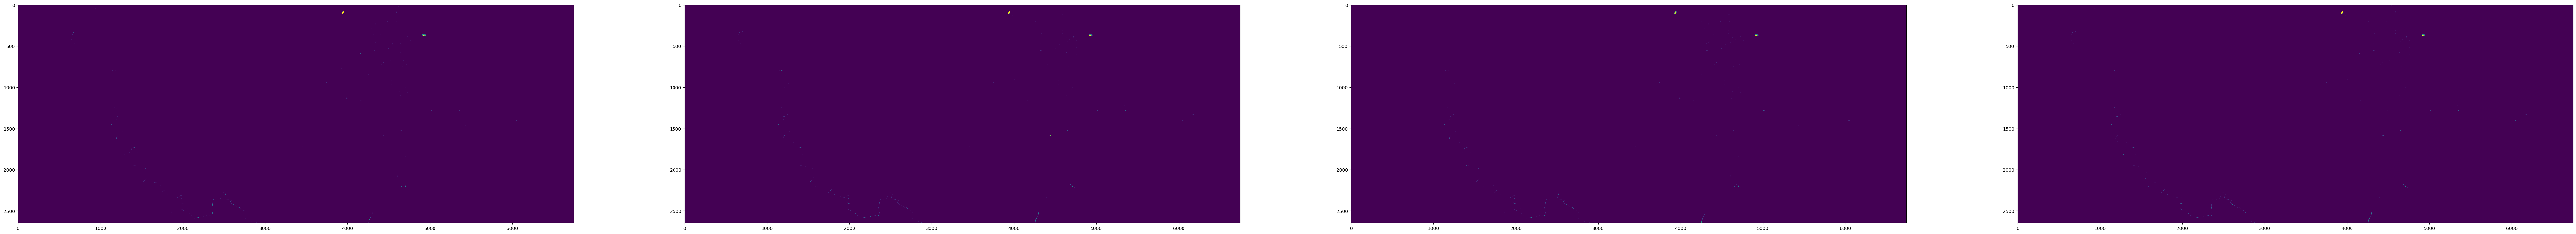

In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(a1))

In [ ]:
df = pd.DataFrame(columns=['Name', 'RasterXSize', 'RasterXSize', 'band_1', 'band_2', 'band_3', 'band_4', 'band_5', 'band_6', 'band_7', 'band_8', 'band_9', 'band_10'])  # ,'dbn1','dbn2','dbn3','dbn4'])
for filename in scena:
    gdalData = gdal.Open(IMAGE_PATH+filename)
    if gdalData is None:
        print("ERROR: can't open raster")
        sys.exit( 1 )
    df.loc[len(df.index)]=[filename, gdalData.RasterXSize, gdalData.RasterYSize,
          gdalData.GetRasterBand( 1 ).ReadAsArray(), gdalData.GetRasterBand( 2 ).ReadAsArray(),
          gdalData.GetRasterBand( 3 ).ReadAsArray(), gdalData.GetRasterBand( 4 ).ReadAsArray(),
          gdalData.GetRasterBand( 5 ).ReadAsArray(), gdalData.GetRasterBand( 6 ).ReadAsArray(),
          gdalData.GetRasterBand( 7 ).ReadAsArray(), gdalData.GetRasterBand( 8 ).ReadAsArray(),
          gdalData.GetRasterBand( 9 ).ReadAsArray(), gdalData.GetRasterBand( 10 ).ReadAsArray()]  #,
          #gdalData.GetProjection(), gdalData.GetGeoTransform()]  # ,[[],[]],[[],[]],[[],[]],[[],[]]]
df
#df=df.sort_values('Name')
#df.reset_index(drop= True , inplace= True )
#df


,Name,RasterXSize,RasterXSize,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,band_10
0,9_1.tif,512,512,"[[1164, 867, 583, 575, 576, 573, 544, 558, 560...","[[1248, 1032, 716, 668, 693, 646, 646, 688, 68...","[[1328, 1184, 916, 882, 918, 850, 861, 916, 86...","[[1290, 1290, 1107, 1107, 1097, 1097, 1086, 10...","[[1417, 1417, 1286, 1286, 1264, 1264, 1218, 12...","[[1502, 1502, 1395, 1395, 1392, 1392, 1373, 13...","[[1670, 1646, 1528, 1498, 1578, 1510, 1470, 15...","[[1585, 1585, 1553, 1553, 1548, 1548, 1517, 15...","[[1865, 1865, 1834, 1834, 1928, 1928, 2069, 20...","[[1653, 1653, 1553, 1553, 1596, 1596, 1728, 17..."
1,9_2.tif,512,512,"[[330, 385, 386, 419, 378, 391, 342, 350, 366,...","[[426, 473, 490, 480, 434, 435, 432, 436, 416,...","[[316, 440, 512, 524, 444, 440, 359, 341, 377,...","[[431, 431, 578, 578, 489, 489, 372, 372, 426,...","[[378, 378, 636, 636, 532, 532, 287, 287, 322,...","[[462, 462, 729, 729, 547, 547, 335, 335, 334,...","[[176, 532, 810, 818, 678, 585, 375, 341, 430,...","[[476, 476, 807, 807, 639, 639, 350, 350, 377,...","[[355, 355, 532, 532, 480, 480, 359, 359, 387,...","[[275, 275, 408, 408, 380, 380, 304, 304, 331,..."
2,5.tif,3230,2336,"[[201, 226, 228, 206, 195, 186, 179, 230, 238,...","[[419, 468, 384, 332, 396, 368, 354, 376, 412,...","[[230, 265, 231, 184, 249, 218, 180, 219, 228,...","[[707, 679, 679, 648, 648, 652, 652, 610, 610,...","[[1752, 1544, 1544, 1378, 1378, 1571, 1571, 16...","[[1895, 1870, 1870, 1529, 1529, 1633, 1633, 19...","[[2010, 2100, 1790, 1506, 1660, 1708, 1676, 20...","[[2025, 2022, 2022, 1780, 1780, 1881, 1881, 21...","[[1195, 1145, 1145, 1076, 1076, 1085, 1085, 10...","[[568, 569, 569, 524, 524, 511, 511, 515, 515,..."
3,2.tif,6744,2648,"[[367, 355, 363, 389, 404, 384, 402, 479, 479,...","[[532, 510, 597, 618, 573, 584, 684, 859, 919,...","[[256, 252, 277, 272, 268, 267, 320, 384, 396,...","[[842, 899, 899, 922, 922, 1101, 1101, 1283, 1...","[[3241, 3458, 3458, 3423, 3423, 3786, 3786, 46...","[[4063, 4062, 4062, 4235, 4235, 4529, 4529, 59...","[[4364, 3838, 4300, 4244, 4224, 4496, 5156, 62...","[[4367, 4298, 4298, 4339, 4339, 5022, 5022, 61...","[[1746, 1754, 1754, 1822, 1822, 2035, 2035, 26...","[[712, 736, 736, 725, 725, 865, 865, 1158, 115..."


In [ ]:
df.to_csv (r'/content/drive/MyDrive/scena41.csv' )

**Here we have one Sentinel-2A image with 10 channels:**


| Name | Description                                          | Resolution |
|------|------------------------------------------------------|------------|
| B02  | Blue, 492.4 nm (S2A), 492.1 nm (S2B)                 | 10m        |
| B03  | Green, 559.8 nm (S2A), 559.0 nm (S2B)                | 10m        |
| B04  | Red, 664.6 nm (S2A), 665.0 nm (S2B)                  | 10m        |
| B05  | Vegetation red edge, 704.1 nm (S2A), 703.8 nm (S2B)  | 20m        |
| B06  | Vegetation red edge, 740.5 nm (S2A), 739.1 nm (S2B)  | 20m        |
| B07  | Vegetation red edge, 782.8 nm (S2A), 779.7 nm (S2B)  | 20m        |
| B08  | NIR, 832.8 nm (S2A), 833.0 nm (S2B)                  | 10m        |
| B8A  | Narrow NIR, 864.7 nm (S2A), 864.0 nm (S2B)           | 20m        |
| B11  | SWIR, 1613.7 nm (S2A), 1610.4 nm (S2B)               | 20m        |
| B12  | SWIR, 2202.4 nm (S2A), 2185.7 nm (S2B)               | 20m        |

**And mask with values from 0 to 1:**

0. backgound
1. water

Показатель индекса NDVI и AWEI для воды находится в диапазоне отрицательных значений, а индексы NDWI, NDMI2, MNDWI имеют положительный значения. Единственный индекс WRI дает значения воды больше 1, в диапазоне от 1 до 4. Значения индекса NDVI для воды находятся в диапазоне от -1 до 0, однако, водоёмы, подверженные процессам эвтрофикации, могут дать показания индекса выше нуля, надводная растительность - близкие к единице, а значения индекса для увлажнённых земель могут оказаться ниже нуля.

In [ ]:
# NDWI=(GREEN-NIR)/ (GREEN+NIR) Normalized Difference Water Index 	 #Вода имеет положительное значение
df['ndwi1']= (df['band_2']-df['band_7'])/(df['band_2']+df['band_7'])


In [ ]:
evset1 = df.ndwi1[2]
plt.figure(figsize=(100, 100))
plt.imshow(evset1) # (pd.DataFrame(df.ndwi1[i]))
plt.colorbar()

Выходные данные этой ячейки слишком велики. Войдите, чтобы просмотреть их.


In [ ]:
evset1 = df.band_10[3]
evset1.shape

In [ ]:
# NDWI=(GREEN-NIR)/ (GREEN+NIR) Normalized Difference Water Index 	 #Вода имеет положительное значение
df['ndwi']= (df['band_2']-df['band_8'])/(df['band_2']+df['band_8'])


In [ ]:
#NDMI2=(NIR-MIR)/(NIR+MIR)	Normalized Difference Moisture Index  #Вода имеет положительное значение
df['ndmi21']= (df['band_7']-df['band_8'])/(df['band_7']+df['band_8'])


In [ ]:
#MNDWI=(GREEN-MIR)/(GREEN+MIR) 	Modified Normalized Difference Water Index  Вода имеет положительное значение
df['mndwi']= (df['band_2']-df['band_8'])/(df['band_2']+df['band_8'])


In [ ]:
#WRI=(GREEN+RED)/(NIR+MIR) 	Water Ratio Index   	Вода имеет значение больше 1
df['wri']= (df['band_2']+df['band_3'])/(df['band_7']+df['band_8'])


In [ ]:
evset1 = df.wri[2]
plt.figure(figsize=(100, 100))
plt.imshow(evset1) # (pd.DataFrame(df.ndwi1[i]))
plt.colorbar()


Выходные данные этой ячейки слишком велики. Войдите, чтобы просмотреть их.


In [ ]:
def normalize(band):
    band_min, band_max = (band.min(), band.max())
    return ((band - band_min) / ((band_max - band_min)))

In [ ]:
evset2 = normalize(df.band_2[3])
evset3 = normalize(df.band_3[3])
evset8 = normalize(df.band_8[3])
evset9 = normalize(df.band_9[3])


In [ ]:
plt.figure(figsize=(100, 100))
        #ax = plt.subplot(5, 4, i + 1)
plt.imshow(evset2)
        #plt.title(pd.DataFrame(df.Name[i]))

Выходные данные этой ячейки слишком велики. Войдите, чтобы просмотреть их.


In [ ]:
awei= 4*(evset2-evset8)/(0.25*evset3+2.75*evset9)

In [ ]:
awei.shape

(2648, 6744)

In [ ]:
plt.figure(figsize=(100, 100))
        #ax = plt.subplot(5, 4, i + 1)
plt.imshow(evset2)
        #plt.title(pd.DataFrame(df.Name[i]))

Выходные данные этой ячейки слишком велики. Войдите, чтобы просмотреть их.


In [ ]:
#AWEI=4×(GREEN-MIR) -(0,25×NIR+2,75×SWIR)  #Automated Water Extraction Index  	 Вода имеет отрицательное значение
df['awei']= 4*(df['band_2']-df['band_8'])/(0.25*df['band_3']+2.75*df['band_9'])


In [ ]:
#AWEI=4×(GREEN-MIR) -(0,25×NIR+2,75×SWIR)  #Automated Water Extraction Index  	 Вода имеет отрицательное значение
df['awei2']= 4*(df['band_2']-df['band_8'])/(0.25*df['band_3']+2.75*df['band_10'])


In [ ]:
# NDVI=(NIR-RED)/(NIR+RED)  вегетационный индекс NDVI  Normalized Difference Vegetation Index   	Вода имеет отрицательное значение
df['ndvi2']= (df['band_7']-df['band_3'])/(df['band_7']+df['band_3'])


In [ ]:
# NDVI=(NIR-RED)/(NIR+RED)  вегетационный индекс NDVI  Normalized Difference Vegetation Index   	Вода имеет отрицательное значение
df['ndvi']= (df['band_8']-df['band_3'])/(df['band_8']+df['band_3'])

In [ ]:
df

,Name,RasterXSize,RasterXSize,band_1,band_2,band_3,band_4,band_5,band_6,band_7,...,band_10,ndwi1,ndwi,ndmi21,mndwi,wri,awei,awei2,ndvi2,ndvi
0,9_1.tif,512,512,"[[1164, 867, 583, 575, 576, 573, 544, 558, 560...","[[1248, 1032, 716, 668, 693, 646, 646, 688, 68...","[[1328, 1184, 916, 882, 918, 850, 861, 916, 86...","[[1290, 1290, 1107, 1107, 1097, 1097, 1086, 10...","[[1417, 1417, 1286, 1286, 1264, 1264, 1218, 12...","[[1502, 1502, 1395, 1395, 1392, 1392, 1373, 13...","[[1670, 1646, 1528, 1498, 1578, 1510, 1470, 15...",...,"[[1653, 1653, 1553, 1553, 1596, 1596, 1728, 17...","[[22.314599040438658, 24.24271844660194, 28.84...","[[23.0141193081539, 24.831104317921284, 28.514...","[[0.026113671274961597, 0.01887960383782111, 2...","[[23.0141193081539, 24.831104317921284, 28.514...","[[0.7913978494623656, 0.6858557722067471, 0.52...","[[11.754429336629585, 11.67316466196599, 11.79...","[[13.159346009943109, 13.078742190323746, 13.8...","[[0.11407605070046697, 0.16325088339222615, 0....","[[0.08822519739100583, 0.14481762369086312, 0...."
1,9_2.tif,512,512,"[[330, 385, 386, 419, 378, 391, 342, 350, 366,...","[[426, 473, 490, 480, 434, 435, 432, 436, 416,...","[[316, 440, 512, 524, 444, 440, 359, 341, 377,...","[[431, 431, 578, 578, 489, 489, 372, 372, 426,...","[[378, 378, 636, 636, 532, 532, 287, 287, 322,...","[[462, 462, 729, 729, 547, 547, 335, 335, 334,...","[[176, 532, 810, 818, 678, 585, 375, 341, 430,...",...,"[[275, 275, 408, 408, 380, 380, 304, 304, 331,...","[[0.4152823920265781, 65.15124378109452, 50.16...","[[72.60088691796008, 69.05479452054794, 50.284...","[[100.05521472392638, 0.05555555555555555, 0.0...","[[72.60088691796008, 69.05479452054794, 50.284...","[[1.138036809815951, 0.9057539682539683, 0.619...","[[61.915185974887464, 60.32128883774453, 40.39...","[[78.22328644118528, 75.64098124098125, 51.414...","[[132.91869918699186, 0.09465020576131687, 0.2...","[[0.20202020202020202, 0.039301310043668124, 0..."
2,5.tif,3230,2336,"[[201, 226, 228, 206, 195, 186, 179, 230, 238,...","[[419, 468, 384, 332, 396, 368, 354, 376, 412,...","[[230, 265, 231, 184, 249, 218, 180, 219, 228,...","[[707, 679, 679, 648, 648, 652, 652, 610, 610,...","[[1752, 1544, 1544, 1378, 1378, 1571, 1571, 16...","[[1895, 1870, 1870, 1529, 1529, 1633, 1633, 19...","[[2010, 2100, 1790, 1506, 1660, 1708, 1676, 20...",...,"[[568, 569, 569, 524, 524, 511, 511, 515, 515,...","[[26.32564841498559, 24.884735202492212, 29.49...","[[26.157937806873978, 25.69558232931727, 26.55...","[[16.23816604708798, 0.018922852983988356, 17....","[[26.157937806873978, 25.69558232931727, 26.55...","[[0.16084262701363072, 0.17782629791363416, 0....","[[17.678355140186916, 18.451010886469675, 18.3...","[[36.500154368632295, 36.37032495401594, 36.35...","[[0.7946428571428571, 0.7758985200845666, 0.77...","[[0.7960088691796009, 0.7682553563620463, 0.79..."
3,2.tif,6744,2648,"[[367, 355, 363, 389, 404, 384, 402, 479, 479,...","[[532, 510, 597, 618, 573, 584, 684, 859, 919,...","[[256, 252, 277, 272, 268, 267, 320, 384, 396,...","[[842, 899, 899, 922, 922, 1101, 1101, 1283, 1...","[[3241, 3458, 3458, 3423, 3423, 3786, 3786, 46...","[[4063, 4062, 4062, 4235, 4235, 4529, 4529, 59...","[[4364, 3838, 4300, 4244, 4224, 4496, 5156, 62...",...,"[[712, 736, 736, 725, 725, 865, 865, 1158, 115...","[[12.602941176470589, 14.307267709291628, 12.6...","[[12.59461114513166, 12.842762063227953, 12.63...","[[7.505783988088421, 7.998525073746313, 0.0002...","[[12.59461114513166, 12.842762063227953, 12.63...","[[0.0902531210628794, 0.09365781710914454, 0.1...","[[10.316719761586683, 10.310856441215593, 10.3...","[[24.82492581602374, 24.14183037853378, 24.235...","[[0.8891774891774892, 0.8767726161369194, 0.87...","[[0.8892494051481722, 0.8892307692307693, 0.87..."


In [ ]:
evset1 = df.awei[3]
evset1.shape

(2648, 6744)

In [ ]:
unique_values1 = np.unique(evset1)
unique_values1

array([0.00000000e+00, 3.63182386e-04, 3.67022985e-04, ...,
       1.46074902e+02, 1.46330532e+02, 1.47001690e+02])

In [ ]:
def normalize(band):
    band_min, band_max = (band.min(), band.max())
    return ((band - band_min) / ((band_max - band_min)))

In [ ]:
def normalize(input_band):
    min_value, max_value = input_band.min()*1.0, input_band.max()*1.0
    return ((input_band*1.0 - min_value*1.0)/(max_value*1.0 - min_value*1.0))

In [ ]:
df['band_1_min']=df[df['band_1'].min()].any()
#df['band_1_max']=df['band_1'].max()

#df['band_11']=normalize(df['band_1'].all())
df

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# **для детального просмотра нажмите на понравившуюся картинку, повторное нажатие возвращает мозаику**

In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(df.band_1[i]))


Выходные данные этой ячейки слишком велики. Войдите, чтобы просмотреть их.


In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(df.band_2[i]))


Выходные данные этой ячейки слишком велики. Войдите, чтобы просмотреть их.


In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(df.band_3[i]))


Выходные данные этой ячейки слишком велики. Войдите, чтобы просмотреть их.


In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(df.band_4[i]))


Выходные данные этой ячейки слишком велики. Войдите, чтобы просмотреть их.


In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(df.band_5[i]))


Выходные данные этой ячейки слишком велики. Войдите, чтобы просмотреть их.


In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(df.band_6[i]))


Выходные данные этой ячейки слишком велики. Войдите, чтобы просмотреть их.


In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(df.band_7[i]))


Выходные данные этой ячейки слишком велики. Войдите, чтобы просмотреть их.


In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(df.band_8[i]))


Выходные данные этой ячейки слишком велики. Войдите, чтобы просмотреть их.


In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(df.band_9[i]))


Выходные данные этой ячейки слишком велики. Войдите, чтобы просмотреть их.


In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(df.band_10[i]))
        plt.title(pd.DataFrame(df.Name[i]))


Выходные данные этой ячейки слишком велики. Войдите, чтобы просмотреть их.


ValueError: DataFrame constructor not properly called!

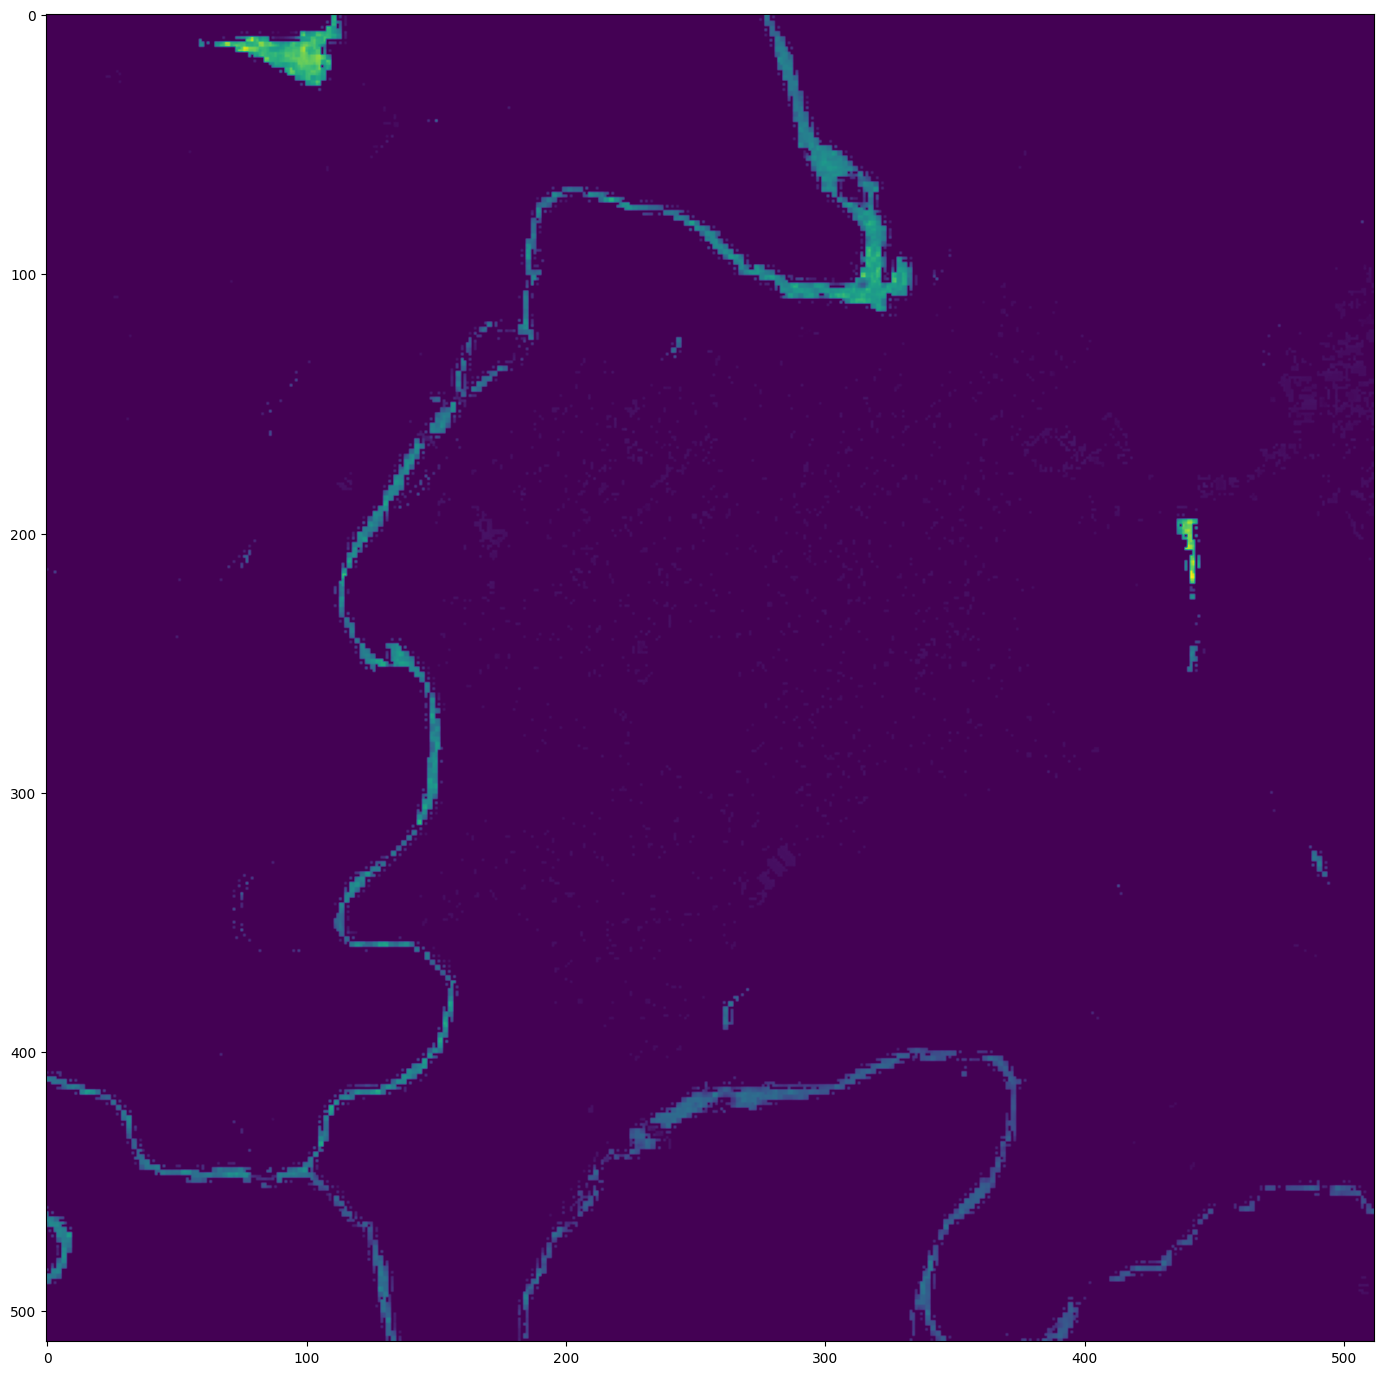

In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(df.ndvi[i]))
        plt.title(pd.DataFrame(df.Name[i]))


TypeError: Image data of dtype object cannot be converted to float

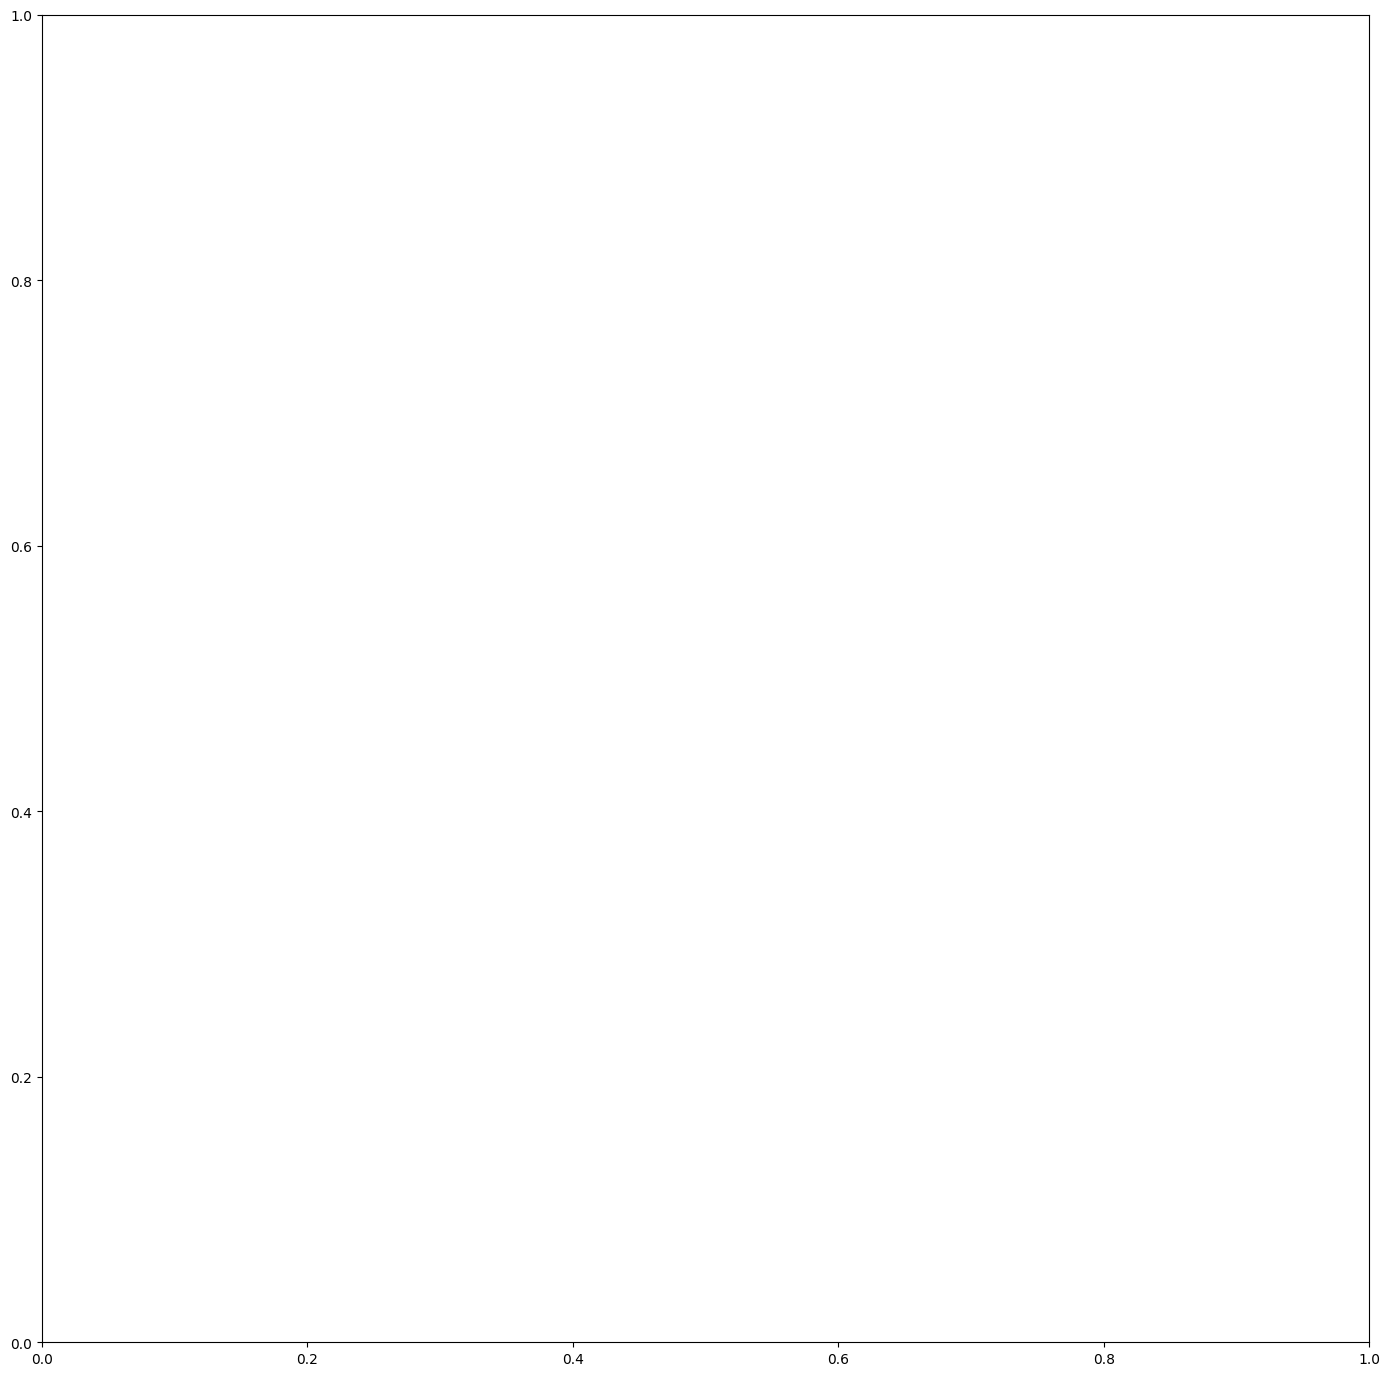

In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(df.ndvi-[i]))
        plt.title(pd.DataFrame(df.Name[i]))


In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(df.band_10[i]))
        plt.title(pd.DataFrame(df.Name[i]))


In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(df.band_10[i]))
        plt.title(pd.DataFrame(df.Name[i]))


In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(df.band_10[i]))
        plt.title(pd.DataFrame(df.Name[i]))


In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(df.band_10[i]))
        plt.title(pd.DataFrame(df.Name[i]))


In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(df.band_10[i]))
        plt.title(pd.DataFrame(df.Name[i]))


In [ ]:
# визуализация целиком
plt.figure(figsize=(100, 100))
plt.imshow(pd.DataFrame(df.band_7[2]))
plt.colorbar()
plt.show()

Выходные данные этой ячейки слишком велики. Войдите, чтобы просмотреть их.


In [ ]:
# визуализация целиком
plt.figure(figsize=(100, 100))
plt.imshow(normalize(pd.DataFrame(df.band_7[1])))
plt.colorbar()
plt.show()

In [ ]:
plt.figure(figsize=(100, 100))
for i in range(4):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(pd.DataFrame(df.band_8[i]))
        #plt.title(pd.DataFrame(df.Name[i]))
        plt.axis("off")

Выходные данные этой ячейки слишком велики. Войдите, чтобы просмотреть их.


# **для детального просмотра нажмите на понравившуюся картинку, повторное нажатие возвращает мозаику**


# **в колабе 12Гб недостаточно памяти отобразить подложку**

# **поиск битых пикселей**

(-0.5, 212.5, 181.5, -0.5)

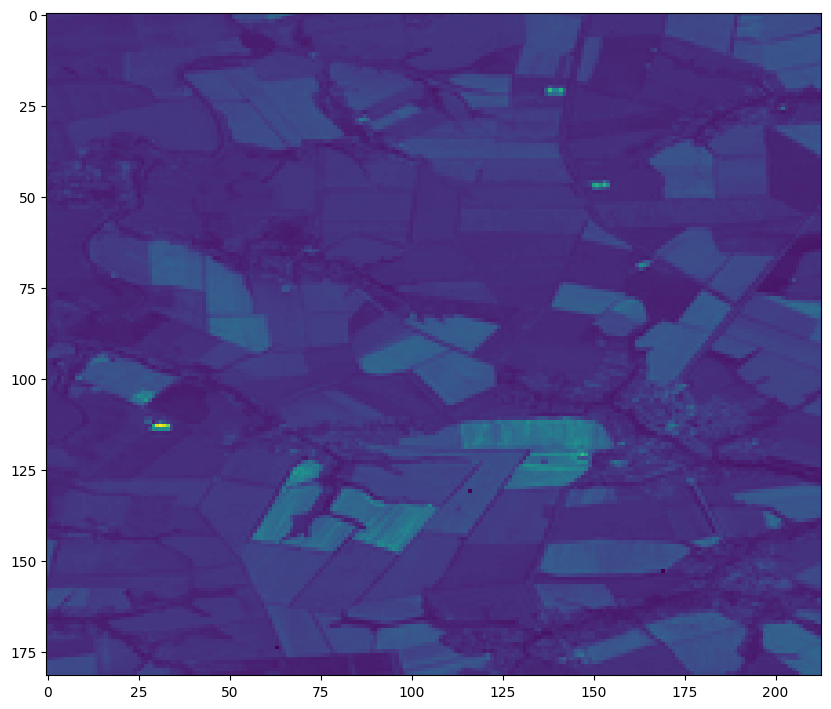

In [ ]:
i=1
plt.figure(figsize=(10, 10))
#plt.figure()
#for i in range(15):
#ax = plt.subplot(1, 1, i + 1)
plt.imshow(evset)
#plt.imshow(pd.DataFrame(df.band_1[i]))
#plt.title(pd.DataFrame(df.Name[i]))
plt.axis("on")